In [ ]:
!pip install control

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctl
from control import (TransferFunction, step_response, bode_plot,
                     feedback, sisotool)

plt.rcParams['figure.figsize'] = (10,10) # tamanho do gráfico
plt.rcParams['font.size'] = 16 # tamanho da letra

In [3]:
# Avaliação do PID ajustado com ZN para sistemas sem oscilação

# valores do sistema aproximado que serão utilizados no controlador
K = 0.5;
L = 0.3;
tau = 1.3;

# planta a ser controlada
G = TransferFunction([1],[1,3,2]); 

# PID por Ziegler Nichols
Cpid = TransferFunction(0.6*tau*np.convolve([1,1/L],[1,1/L]),[1,0]);


Malha Aberta =  
0.78 s^2 + 5.2 s + 8.667
------------------------
   s^3 + 3 s^2 + 2 s



<function matplotlib.pyplot.show(*args, **kw)>

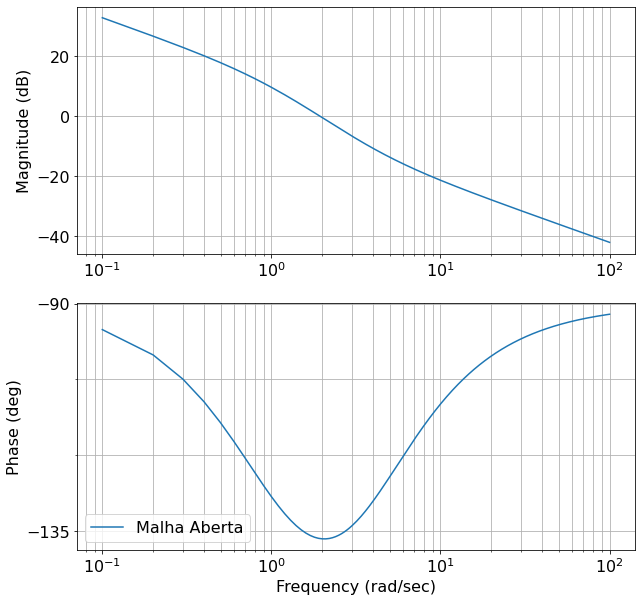

In [4]:

# Bode da Malha aberta
MA = Cpid*G # malha aberta
print('Malha Aberta = ', MA)

w = np.linspace(0.1, 100, 1001) # faixa de freq.
plt.figure(1)
mag, phase, omega = bode_plot(MA, omega=w, dB=True)
plt.legend(["Malha Aberta"])
plt.show



Malha Fechada =  
   0.78 s^2 + 5.2 s + 8.667
------------------------------
s^3 + 3.78 s^2 + 7.2 s + 8.667



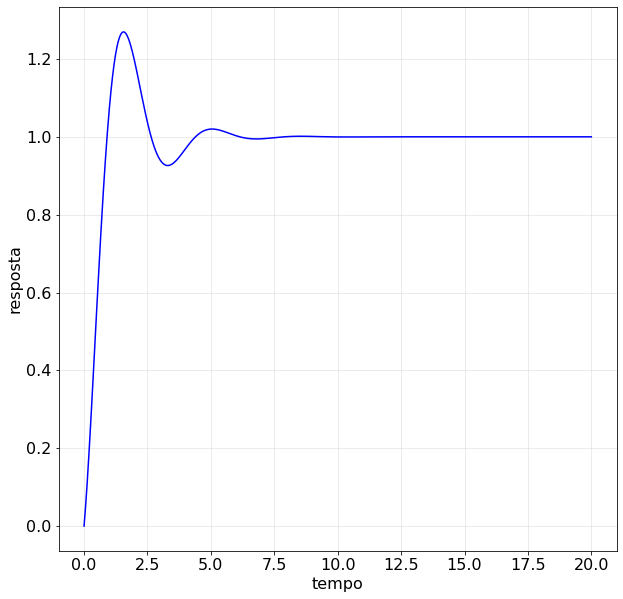

In [9]:

# Resposta ao degrau da Malha Fechada
MF = feedback(1*MA, 1) # malha fechada
print('Malha Fechada = ', MF)

t = np.linspace(0, 20, 1001) # intervalo de tempo

plt.figure(2)
tout, yout1 = step_response(MF, t, X0=0)
plt.plot(tout, yout1, 'b', linewidth=1.5)
plt.grid(alpha=0.3)
plt.xlabel('tempo')
plt.ylabel('resposta')
plt.show()

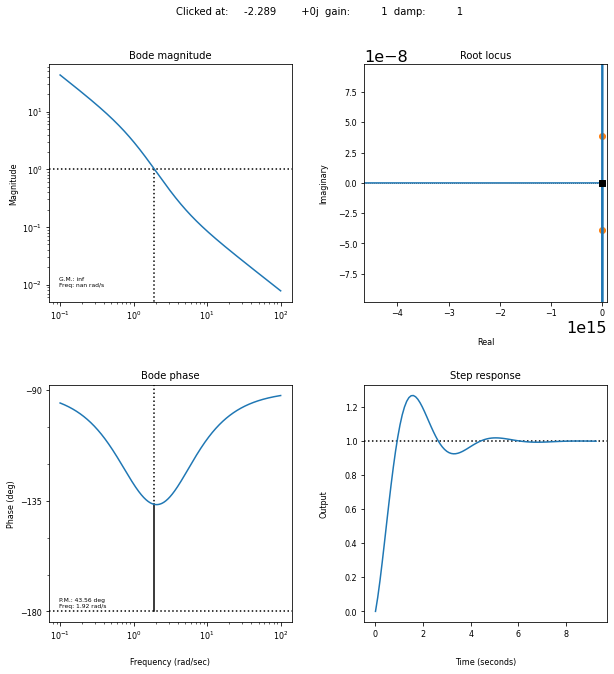

In [8]:
# Avaliação pelo sisotool
# sisotool apresenta o Diagrama de Bode da malha aberta
# Lugar das Raízes 
# resposta ao degaru da malha fechada

# https://python-control.readthedocs.io/en/latest/generated/control.sisotool.html
ctl.sisotool(1*MA)